# Lab 9: PCA from Scratch
## by Tiffany Nguyen
The purpose of this lab is to implement principal component analysis (PCA) for dimensionality reduction to classify digits in the MNIST Dataset.

### Part 1: Read Data

In [169]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X = mnist["data"]
imgX = X[0:2000] # get first 2000 images
print(imgX.shape)

(2000, 784)


### Part 2: Center the Data
Center the data by subtracting off the mean

In [126]:
import numpy as np

In [170]:
mean = np.mean(imgX, axis=0) #get mean
print("mean shape:", mean.shape)
centeredX = imgX - mean #subtract all values by mean to center

mean shape: (784,)


### Part 3: Feature Covariance and Eigenvalue/Eigenvector
$$Covariance=\frac{X^TX}{N}$$

In [171]:
# Calculate Covariance
N = centeredX.shape[0] #2000
covariance = np.divide(np.dot(centeredX.T, centeredX), N)
print("covariance shape:", covariance.shape)

covariance shape: (784, 784)


In [172]:
# Get eigenvector and eigenvalue of covariance matrix
eigenvalue, eigenvector = np.linalg.eigh(covariance)
eigenvector = np.transpose(eigenvector)
print("Eigenvalue Shape:", eigenvalue.shape)
print("Eigenvector Shape:", eigenvector.shape)

Eigenvalue Shape: (784,)
Eigenvector Shape: (784, 784)


### Part 3: Get Principal Components
Eigenvectors are the principal components once sorted

In [173]:
# get sorted indices and flip so it's in descending order
eigenvalueIndex = np.argsort(eigenvalue)[::-1]

# sort eigenvalue and eigenvector
sortedEigenvalue = eigenvalue[eigenvalueIndex]
# print(sortedEigenvalue)
sortedEigenvector = eigenvector[eigenvalueIndex]

### Part 4: Compute Variance

In [174]:
totalEigenvalue = sum(sortedEigenvalue)
variance = np.cumsum(sortedEigenvalue)/totalEigenvalue
print("Variance:")
print(" 1 Principal component:", variance[0])
print(" 2 Principal component:", variance[1])
print(" 3 Principal component:", variance[2])


Variance:
 1 Principal component: 0.1000953778012431
 2 Principal component: 0.17470154993273262
 3 Principal component: 0.23933843060972856


### Part 5: Perform Dimensionality Reduction
2D Plot uses first 2 PCs

3D Plot uses first 3 PCs

In [175]:
reducedImg2D = np.dot(centeredX, np.transpose(sortedEigenvector[:2]))
print(reducedImg2D.shape)
reducedImg3D = np.dot(centeredX, np.transpose(sortedEigenvector[:3]))
print(reducedImg3D.shape)

(2000, 2)
(2000, 3)


### Part 6: Plot Dimensionality-Reduced Data

In [176]:
import matplotlib.pyplot as plt

In [177]:
# Get target labels (digits) for the graph color
targetLabels = mnist["target"][0:2000]
# print(targetLabels)

intTargetLabels = np.array(targetLabels, dtype=int)
print(intTargetLabels)
print(intTargetLabels.shape)

[5 0 4 ... 5 2 0]
(2000,)


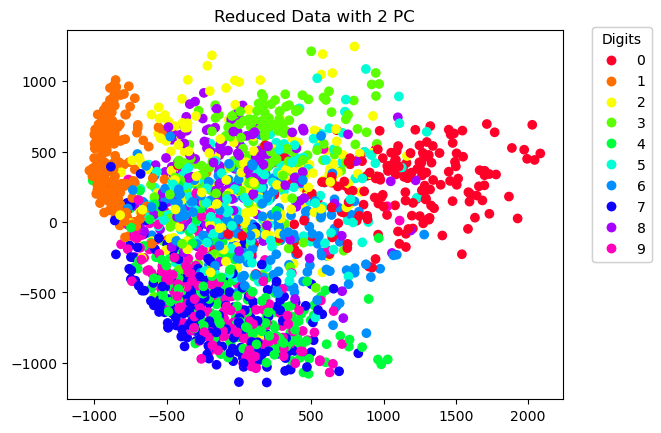

In [178]:
# Plot 2D Scatterplot
fig, ax = plt.subplots()
scatter = ax.scatter(reducedImg2D[:,0], reducedImg2D[:,1], c=intTargetLabels, cmap="gist_rainbow")
plt.title("Reduced Data with 2 PC")

legend = fig.legend(*scatter.legend_elements(),bbox_to_anchor=(1.05, 0.9),
                    loc="outside upper right", title="Digits")
ax.add_artist(legend)
plt.show()


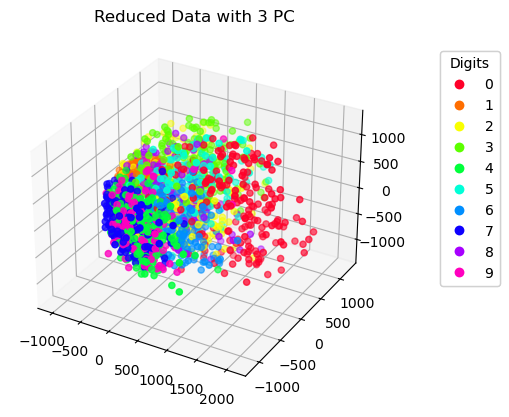

In [179]:
# Plot 3D Scatterplot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(reducedImg3D[:,0], reducedImg3D[:,1], reducedImg3D[:,2],c=intTargetLabels, cmap="gist_rainbow")
plt.title("Reduced Data with 3 PC")

legend = fig.legend(*scatter.legend_elements(), bbox_to_anchor=(1, 0.85),
                    loc="outside upper right", title="Digits")
ax.add_artist(legend)
plt.show()
